In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

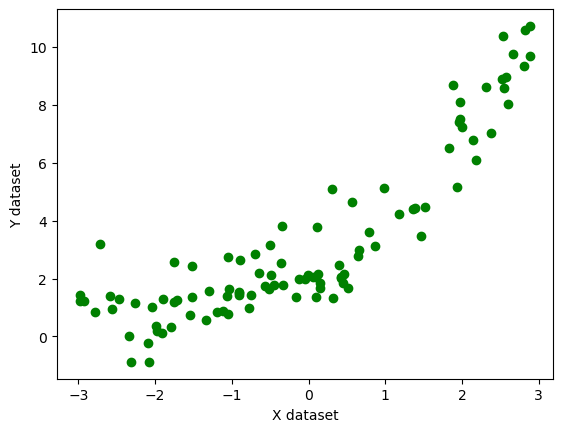

In [12]:
x=6*np.random.rand(100,1)-3
y= 0.5 * x**2 + 1.5*x + 2 +np.random.randn(100,1)
#quadratic equation used 0.5x2+1.5x+2+outliers
plt.scatter(x,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("Y dataset")
# plt.legend("our dataset")

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
##first implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [ ]:
##here no need to standardization

In [16]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(x_test))
print(score)##seeing some low accuracy when done a linear regression

0.7107147270958545


Text(0, 0.5, 'Y dataset')

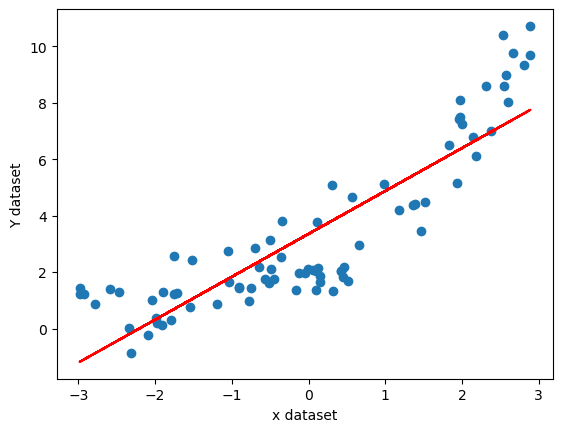

In [19]:
##lets visualize this model:linear regression
plt.plot(x_train,regression_1.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel("x dataset")
plt.ylabel("Y dataset")

In [20]:
###Let's apply ploynomial transormation
from sklearn.preprocessing import PolynomialFeatures


In [21]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [22]:
x_train_poly
#############Bias###########x1 feature#######x1^2 feature######

array([[ 1.00000000e+00,  4.43570060e-01,  1.96754398e-01],
       [ 1.00000000e+00, -1.20402938e-01,  1.44968674e-02],
       [ 1.00000000e+00, -1.20008144e+00,  1.44019546e+00],
       [ 1.00000000e+00,  9.82222440e-01,  9.64760922e-01],
       [ 1.00000000e+00, -1.98903768e+00,  3.95627090e+00],
       [ 1.00000000e+00, -6.40683025e-01,  4.10474739e-01],
       [ 1.00000000e+00,  1.23463720e-01,  1.52432902e-02],
       [ 1.00000000e+00, -1.97569798e+00,  3.90338250e+00],
       [ 1.00000000e+00,  1.99510945e+00,  3.98046170e+00],
       [ 1.00000000e+00, -4.87403889e-02,  2.37562551e-03],
       [ 1.00000000e+00, -3.60813738e-01,  1.30186553e-01],
       [ 1.00000000e+00, -1.04149533e-02,  1.08471253e-04],
       [ 1.00000000e+00, -2.47365488e+00,  6.11896846e+00],
       [ 1.00000000e+00,  1.42225630e-01,  2.02281299e-02],
       [ 1.00000000e+00, -5.13429318e-01,  2.63609665e-01],
       [ 1.00000000e+00, -2.58909910e+00,  6.70343415e+00],
       [ 1.00000000e+00,  1.51117556e-01

In [23]:
x_test_poly

array([[ 1.        , -1.11175907,  1.23600822],
       [ 1.        , -1.52671995,  2.33087379],
       [ 1.        , -0.3332431 ,  0.11105096],
       [ 1.        ,  2.81847915,  7.94382474],
       [ 1.        , -1.06716859,  1.13884879],
       [ 1.        , -2.71450969,  7.36856286],
       [ 1.        , -0.90231704,  0.81417603],
       [ 1.        , -1.29985233,  1.68961609],
       [ 1.        ,  1.88025047,  3.53534183],
       [ 1.        , -0.89120488,  0.79424614],
       [ 1.        , -2.56682416,  6.58858628],
       [ 1.        , -1.04646123,  1.0950811 ],
       [ 1.        ,  0.79270579,  0.62838247],
       [ 1.        ,  0.39188232,  0.15357176],
       [ 1.        ,  0.64037432,  0.41007927],
       [ 1.        ,  0.87027785,  0.75738354],
       [ 1.        ,  2.525699  ,  6.37915545],
       [ 1.        , -2.08591763,  4.35105237],
       [ 1.        , -1.34130035,  1.79908663],
       [ 1.        , -2.26659198,  5.1374392 ]])

In [28]:
#now apply linear regression on this training dataset
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score*100)###performance gets increased

89.83288734141611


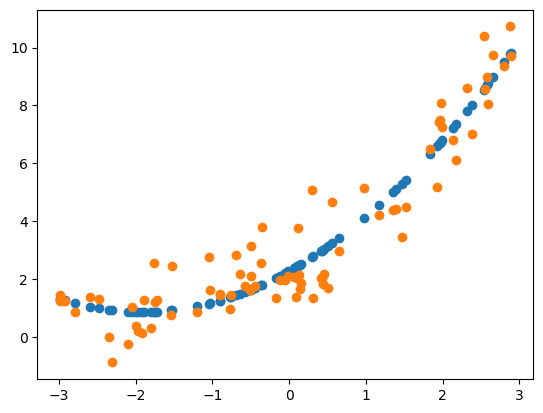

In [27]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [ ]:
##prediction of new data set
x_new = np.linspace(-3, 3, 200).reshape(200,1)
x_new_poly = poly.transform(x_new)

# PIPELINE CONCEPTS

In [30]:
from sklearn.pipeline import Pipeline

   

In [33]:
def poly_regression(degree):
    x_new = np.linspace(-3, 3, 200).reshape(200,1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train)
    y_pred_new=poly_regression.predict(x_new)
    #plotting prediction line
    plt.plot(x_new,y_pred_new,'r',label="Degree" + str(degree), linewidth=3)
    plt.plot(x_train,y_train,"b.",linewidth=3)
    plt.plot(x_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()

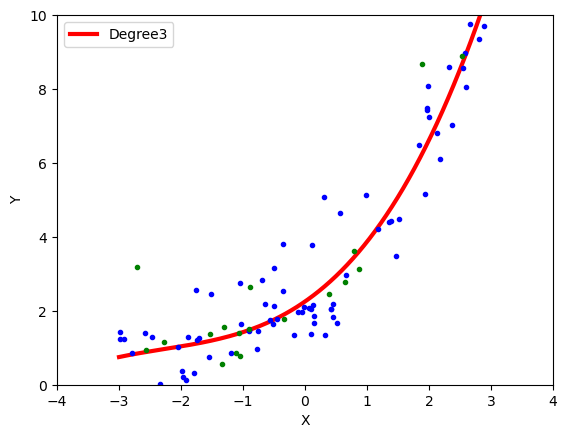

In [43]:
poly_regression(3)